In [23]:
import pandas as pd
from pathlib import Path
import numpy as np 
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, "..")   
from src.plot_util import plot_grouped_bar_iqr, plot_grouped_bar_iqr_comparison

In [24]:
%reload_ext autoreload
%autoreload 2

In [25]:
path=Path("../output/metrics/20251120_2013_2014_store_2000_item_cyc_features_ml_metrics.xlsx")
ml_df = pd.read_excel(path)
ml_df.head()

,Model,Store,Item,RMSSE,MASE,SMAPE,MARRE,RMSE,MAE,OPE
0,EXPONENTIAL_SMOOTHING,25,1003679,0.482754,0.502895,186.264151,11.434536,0.747808,0.428795,106.515636
1,AUTO_ARIMA,25,1003679,0.460660,0.425164,196.475750,9.667147,0.713584,0.362518,103.867128
2,THETA,25,1003679,0.457320,0.424786,197.835978,9.658537,0.708411,0.362195,85.520397
3,KALMAN,25,1003679,0.459997,0.409380,199.927830,9.308250,0.712556,0.349059,99.333999
4,EXPONENTIAL_SMOOTHING,25,1004550,0.641093,0.484211,114.837232,5.212264,1.660292,0.779415,3.061403


In [26]:
ml_df = ml_df[ml_df["Model"] != "KALMAN"]

In [27]:
ml_df.head()

,Model,Store,Item,RMSSE,MASE,SMAPE,MARRE,RMSE,MAE,OPE
0,EXPONENTIAL_SMOOTHING,25,1003679,0.482754,0.502895,186.264151,11.434536,0.747808,0.428795,106.515636
1,AUTO_ARIMA,25,1003679,0.460660,0.425164,196.475750,9.667147,0.713584,0.362518,103.867128
2,THETA,25,1003679,0.457320,0.424786,197.835978,9.658537,0.708411,0.362195,85.520397
4,EXPONENTIAL_SMOOTHING,25,1004550,0.641093,0.484211,114.837232,5.212264,1.660292,0.779415,3.061403
5,AUTO_ARIMA,25,1004550,0.702330,0.622113,137.121891,6.696710,1.818883,1.001392,1.182828


In [28]:
metrics_stats = ml_df.groupby('Model')[['RMSSE', 'MASE', 'SMAPE', "MARRE"]].agg(['mean', 'std']).reset_index()
metrics_stats

Model     RMSSE                MASE                  SMAPE  \
                              mean       std      mean        std        mean   
0             AUTO_ARIMA  0.781149  2.292016  0.758826   1.360235  166.490706   
1  EXPONENTIAL_SMOOTHING  0.821142  3.913351  1.030057  31.169984  161.390780   
2                  THETA  0.799261  2.290455  0.791237   1.370036  166.539162   

                  MARRE               
         std       mean          std  
0  19.514891  14.277205    11.549557  
1  24.548920  29.387452  1954.325562  
2  21.216594  16.564928    45.078790

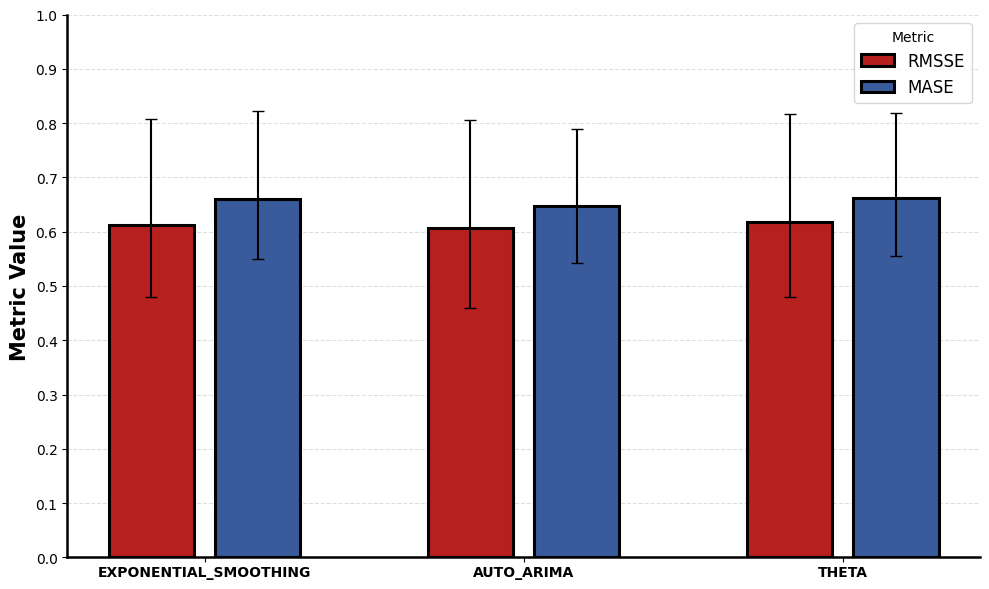

In [38]:
path = Path("../output/figures/ml_metrics.png")
plot_grouped_bar_iqr( ["RMSSE", "MASE"], ml_df, figsize=(10, 6), 
                    y_min=0.0, 
                    y_max=1,
                    y_tick_step=0.1,
                    fn=path
)

In [29]:
path=Path("../output/metrics/20251120_2013_2014_store_2000_item_cyc_features_dl_metrics.xlsx")
dl_df = pd.read_excel(path)
dl_df.head()

,Model,Store,Item,RMSSE,MASE,SMAPE,MARRE,RMSE,MAE,OPE
0,NBEATS,25,1003679,0.450987,0.472712,191.787507,10.748272,0.698600,0.403060,39.381429
1,TFT,25,1003679,0.577193,0.764246,180.736521,17.376993,0.894099,0.651637,119.289590
2,TSMIXER,25,1003679,0.455395,0.584573,182.113490,13.291691,0.705428,0.498438,64.562325
3,BLOCK_RNN,25,1003679,0.449848,0.512603,187.566500,11.655278,0.696836,0.437073,1.232596
4,TCN,25,1003679,0.452791,0.528785,186.362480,12.023206,0.701394,0.450870,12.109888


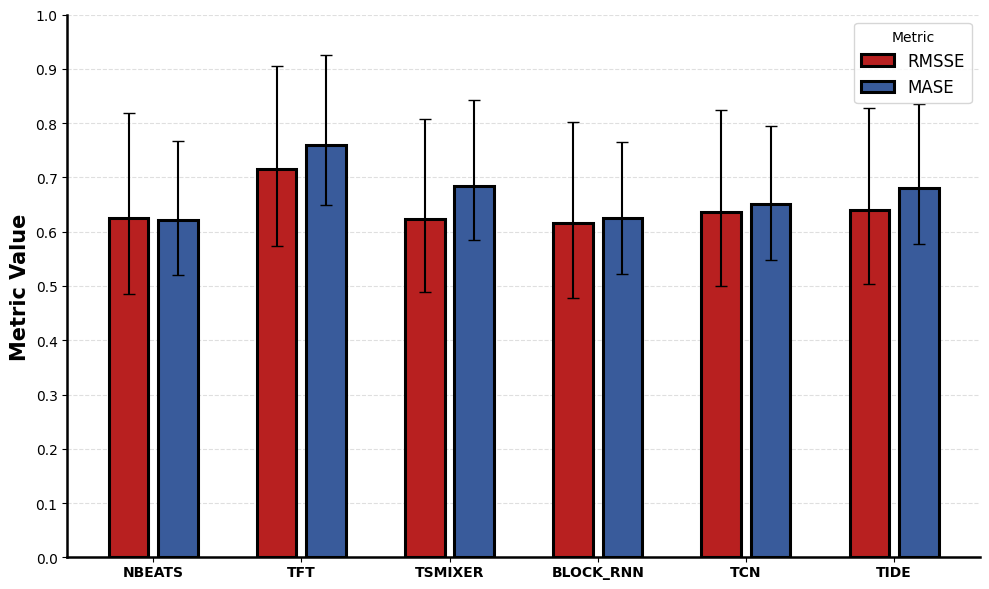

In [37]:
path = Path("../output/figures/dl_metrics.png")
plot_grouped_bar_iqr( ["RMSSE", "MASE"], dl_df, 
                     figsize=(10, 6), 
                     y_min=0.0, 
                     y_max=1,
                     y_tick_step=0.1,
                     fn=path)